### IMPORT LIBRARIES

In [1]:
from pathlib import Path 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
DATA_PATH = Path("data") 

In [3]:
df=pd.read_csv("credit_train.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'credit_train.csv'

In [5]:
df

NameError: name 'df' is not defined

In [82]:
# Number of Records
print(f"Number of rows in the dataset:{df.shape[0]}")
print(f"Number of columns in the dataset:{df.shape[1]}")

Number of rows in the dataset:100514
Number of columns in the dataset:19


In [83]:
df.replace('na', np.nan, inplace = True) 
df.replace('null', np.nan, inplace = True) 
df.replace('NA', np.nan, inplace = True) 
df.replace('NULL', np.nan, inplace = True) 
df.replace('Null', np.nan, inplace = True)  
df.replace('NaN', np.nan, inplace = True) 

In [84]:
new_df_filter = df.dropna(axis = 'index', how = 'any')
new_df_filter

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,44484.0,Short Term,717.0,1152426.0,10+ years,Home Mortgage,small_business,6280.64,21.0,12.0,6.0,0.0,961932.0,0.0,0.0,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,210584.0,Short Term,719.0,783389.0,1 year,Home Mortgage,Other,3727.61,17.4,18.0,6.0,0.0,456.0,259160.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [85]:
new_df_filter.isnull()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99993,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
new_df_filter.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [87]:
new_df_filter.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,3.642300e+04,36423.000000,3.642300e+04,36423.000000,36423.000000,36423.000000,36423.000000,36423.000000,3.642300e+04,3.642300e+04,36423.000000,36423.000000
mean,1.377581e+07,1055.688905,1.464561e+06,19269.251544,19.065000,34.851358,11.490816,0.186036,2.636261e+05,6.651413e+05,0.114790,0.038575
std,3.406789e+07,1438.252560,9.357681e+05,12100.926465,6.654911,21.916600,4.991626,0.528248,3.176197e+05,5.703167e+06,0.359648,0.298938
min,2.145000e+04,585.000000,1.112450e+05,0.000000,3.800000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.907840e+05,702.000000,9.309050e+05,11125.735000,14.500000,16.000000,8.000000,0.000000,1.010515e+05,2.472910e+05,0.000000,0.000000
50%,3.247200e+05,721.000000,1.260498e+06,17117.480000,17.700000,31.000000,11.000000,0.000000,1.869600e+05,4.214760e+05,0.000000,0.000000
75%,5.421900e+05,738.000000,1.742766e+06,24766.120000,22.400000,51.000000,14.000000,0.000000,3.284340e+05,7.029660e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.083900e+07,229057.920000,70.500000,176.000000,48.000000,15.000000,7.350321e+06,7.982554e+08,7.000000,15.000000


In [88]:
# Define a function to perform range normalization
def range_normalization(x):
    return (x - x.min()) / (x.max() - x.min())

# Apply the range normalization function to all columns except the non-numeric ones
new_df_filter[new_df_filter.select_dtypes(include=['float64', 'int64']).columns] = new_df_filter[new_df_filter.select_dtypes(include=['float64', 'int64']).columns].apply(range_normalization)

new_df_filter


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,1.000000,Short Term,0.022527,0.069014,8 years,Own Home,Debt Consolidation,0.127481,0.166417,0.164773,0.361702,0.066667,0.040542,0.000940,0.000000,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,0.001962,Short Term,0.020939,0.034918,< 1 year,Home Mortgage,Debt Consolidation,0.047390,0.236882,0.056818,0.255319,0.066667,0.016621,0.000341,0.142857,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,0.005274,Short Term,0.013430,0.079663,2 years,Rent,Debt Consolidation,0.081465,0.281859,0.187500,0.063830,0.000000,0.059476,0.000695,0.000000,0.0
10,32c2e48f-1ba8-45e0-a530-9a6622c18d9c,0de7bcdb-ebf4-4608-ba39-05f083f855b6,Fully Paid,1.000000,Short Term,0.020650,0.019636,3 years,Rent,Debt Consolidation,0.051738,0.182909,0.431818,0.319149,0.000000,0.027749,0.000363,0.000000,0.0
12,403d7235-0284-4bb6-919a-09402fecbf7b,11581f68-de3c-49d8-80d9-22268ebb323b,Fully Paid,1.000000,Short Term,0.022383,0.021640,< 1 year,Own Home,Debt Consolidation,0.050547,0.070465,0.142045,0.106383,0.000000,0.018242,0.000276,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,686017b3-dc24-4f8a-af92-0bd077452d3d,1a583add-21ba-410f-9c42-757c4ed19322,Fully Paid,1.000000,Short Term,0.022671,0.035108,< 1 year,Rent,other,0.052257,0.244378,0.090909,0.170213,0.000000,0.005087,0.000168,0.000000,0.0
99993,79b81158-5d55-4766-8ad6-ebcd683f7d59,e45e8dc4-05ad-4efe-92cc-784a6d5ef61a,Fully Paid,0.000230,Short Term,0.019061,0.033884,10+ years,Home Mortgage,small_business,0.027419,0.257871,0.068182,0.106383,0.000000,0.130869,0.000000,0.000000,0.0
99994,8506a4e9-af7d-47d2-a1bf-7ea2c41858f0,be67200e-1ef1-4b63-86a6-2bf27d3c704d,Fully Paid,0.001892,Short Term,0.019350,0.021874,1 year,Home Mortgage,Other,0.016274,0.203898,0.102273,0.106383,0.000000,0.000062,0.000325,0.000000,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,1.000000,Short Term,0.021227,0.038342,1 year,Rent,Debt Consolidation,0.057230,0.083958,0.119318,0.446809,0.000000,0.020822,0.000638,0.000000,0.0


In [89]:
new_df_filter.shape

(36423, 19)

In [90]:
# begin encoding
# get info about all the datatypes
new_df_filter.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [91]:
# drop the id columns
new_df_filter.drop(columns=['Loan ID'], inplace=True)
new_df_filter.drop(columns=['Customer ID'], inplace=True)

# Select the categorical columns
cat_cols = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# encode the categorical columns
new_df_filter = pd.get_dummies(new_df_filter, columns=cat_cols)
# Print the modified dataset
print(new_df_filter)

      Loan Status  Current Loan Amount  Credit Score  Annual Income  \
2      Fully Paid             1.000000      0.022527       0.069014   
6      Fully Paid             0.001962      0.020939       0.034918   
8      Fully Paid             0.005274      0.013430       0.079663   
10     Fully Paid             1.000000      0.020650       0.019636   
12     Fully Paid             1.000000      0.022383       0.021640   
...           ...                  ...           ...            ...   
99990  Fully Paid             1.000000      0.022671       0.035108   
99993  Fully Paid             0.000230      0.019061       0.033884   
99994  Fully Paid             0.001892      0.019350       0.021874   
99996  Fully Paid             1.000000      0.021227       0.038342   
99997  Fully Paid             0.000817      0.022671       0.033823   

       Monthly Debt  Years of Credit History  Months since last delinquent  \
2          0.127481                 0.166417                      0.1

In [92]:
# separate x and y
# separate x and y
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
new_df_filter.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in new_df_filter.columns.values]
target_column = "Loan Status"
y = new_df_filter[target_column]
X = new_df_filter.drop(target_column, axis=1)

In [93]:
X

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,1.000000,0.022527,0.069014,0.127481,0.166417,0.164773,0.361702,0.066667,0.040542,0.000940,...,0,0,0,0,0,0,0,0,0,0
6,0.001962,0.020939,0.034918,0.047390,0.236882,0.056818,0.255319,0.066667,0.016621,0.000341,...,0,0,0,0,0,0,0,0,0,0
8,0.005274,0.013430,0.079663,0.081465,0.281859,0.187500,0.063830,0.000000,0.059476,0.000695,...,0,0,0,0,0,0,0,0,0,0
10,1.000000,0.020650,0.019636,0.051738,0.182909,0.431818,0.319149,0.000000,0.027749,0.000363,...,0,0,0,0,0,0,0,0,0,0
12,1.000000,0.022383,0.021640,0.050547,0.070465,0.142045,0.106383,0.000000,0.018242,0.000276,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,1.000000,0.022671,0.035108,0.052257,0.244378,0.090909,0.170213,0.000000,0.005087,0.000168,...,0,0,0,0,0,1,0,0,0,0
99993,0.000230,0.019061,0.033884,0.027419,0.257871,0.068182,0.106383,0.000000,0.130869,0.000000,...,0,0,0,0,0,0,0,1,0,0
99994,0.001892,0.019350,0.021874,0.016274,0.203898,0.102273,0.106383,0.000000,0.000062,0.000325,...,0,1,0,0,0,0,0,0,0,0
99996,1.000000,0.021227,0.038342,0.057230,0.083958,0.119318,0.446809,0.000000,0.020822,0.000638,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y

2        Fully Paid
6        Fully Paid
8        Fully Paid
10       Fully Paid
12       Fully Paid
            ...    
99990    Fully Paid
99993    Fully Paid
99994    Fully Paid
99996    Fully Paid
99997    Fully Paid
Name: Loan Status, Length: 36423, dtype: object

In [95]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder
le_train = LabelEncoder()
y_train = le_train.fit_transform(y_train)
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)

In [123]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(max_depth=4,n_estimators=2,random_state = 42)
rf.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = rf.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('RF accuracy:', accuracy)

RF accuracy: 0.8451612903225807


In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assume X is your feature set and y is the target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)

# Make predictions on the validation set
y_pred_val = rf.predict(X_val)

# Print the classification report for the validation set
print(classification_report(y_val, y_pred_val))

# Make predictions on the testing set
y_pred_test = rf.predict(X_test)

# Print the classification report for the testing set
print(classification_report(y_test, y_pred_test))

ModuleNotFoundError: No module named 'imblearn'

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 103 1406]
 [   2 5774]]


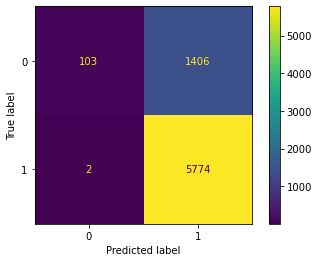

In [107]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=None)
display.plot()

In [99]:
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, log_loss
# calculate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
# calculate the F1 score of the model
f1 = f1_score(y_test, y_pred, average='macro')
# calculate the ROC curve and AUC of the model
y_prob = rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1],pos_label=1)
roc_auc = auc(fpr, tpr)
# calculate the log loss of the model
logloss = log_loss(y_test, y_prob)

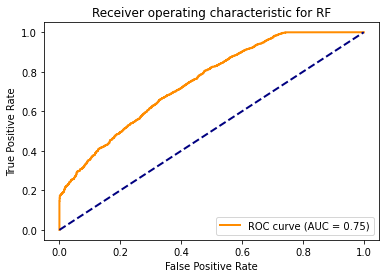

In [125]:
# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RF')
plt.legend(loc="lower right")
plt.show()

In [133]:
print("RF F1 Score:",f1)
print("RF AUC: ",roc_auc)
print("RF Log Loss: ",logloss)

RF F1 Score: 0.6575659506683958
RF AUC:  0.7485329252554846
RF Log Loss:  0.4346800881449296


In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 
              'max_depth': [2,4,6,3, 5, 7], 
              'min_samples_split': [2, 4, 6]}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ )

Best Parameters:  {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8500583690883998


In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40      1509
           1       0.84      1.00      0.91      5776

    accuracy                           0.85      7285
   macro avg       0.92      0.63      0.66      7285
weighted avg       0.87      0.85      0.81      7285



In [129]:
# logistic modeling
rf_tunned = RandomForestClassifier(max_depth=4,n_estimators=200,random_state = 42)
rf_tunned.fit(X_train , y_train)
y_pred_tunned = rf_tunned.predict(X_test)
accuracy_tunned = accuracy_score(y_test, y_pred_tunned)
print("Tuned RF Accuracy:", accuracy_tunned)

Tuned RF Accuracy: 0.8452985586822237


In [131]:
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, log_loss
# calculate the precision of the model
precision_tunned = precision_score(y_test, y_pred_tunned, average='macro')
# calculate the F1 score of the model
f1_tunned = f1_score(y_test, y_pred_tunned, average='macro')
# calculate the ROC curve and AUC of the model
y_prob_tunned = rf_tunned.predict_proba(X_test)
fpr_tunned, tpr_tunned, thresholds_tunned = roc_curve(y_test, y_prob_tunned[:, 1],pos_label=1)
roc_auc_tunned = auc(fpr_tunned, tpr_tunned)
# calculate the log loss of the model
logloss_tunned = log_loss(y_test, y_prob_tunned)

In [132]:
print("Tuned RF F1 Score: ",f1_tunned)
print("Tuned RF AUC: ", roc_auc_tunned)
print("Tuned RF Log Loss: ", logloss_tunned)

Tuned RF F1 Score:  0.6575659506683958
Tuned RF AUC:  0.7480539202458379
Tuned RF Log Loss:  0.4331414972449293
